
# Data Programming in Python; Coursework 2 
<span style="font-size: 20px; color: black; font-family: Arial;">Analyzing the Relationship between GDP per Capita Decline in the Global South and Asylum Applications in the United States</span>


### 1. Introduction

The primary objective of this research is to investigate the potential relationship between economic downturns in South American countries, as indicated by a decrease in GDP per capita, and an increase in asylum applications in the United States. This analysis will provide insights into how economic factors may drive migration trends, specifically for asylum-seeking populations.
In recent years, economic instability in South American countries has raised questions about its potential impact on migration patterns. 
A noticeable trend is the increase in asylum applications submitted to the United States, coinciding with a decline in GDP across several nations in South America.

### 2. Hypothesis

The hypothesis for this research is that as GDP per capita for South American countries decreases over time, the number of asylum applications in the United States increases.

### 3. Research Objectives

•⁠  ⁠To gather and analyze data on GDP per capita for selected Latin American countries over a specified period.

•⁠  ⁠To obtain data on the number of asylum applications submitted by South American nationals in the United States for the same time frame.

•⁠  ⁠To conduct a linear regression analysis to test the strength and direction of the relationship between GDP per capita and asylum applications.

•⁠  ⁠To assess whether declines in economic conditions, as measured by GDP per capita, correlate with an increase in asylum applications.

### 4. Methodology

**Data Collection:**

•⁠  ⁠*GDP per capita* data is sourced from the World Bank DataBank for each Latin American country included in the study. I have excluded Venezuela from the GDP dataset because due to the political instability since the rise of President Maduro, the GDP findings have been excluded from the DataBank. 

•⁠  ⁠*Asylum applications* data is ethically sourced from the **open source** dataset from The United States Citizenship and Immigration Services. I have manually extracted the number of Applications submitted, approved, denied, and pending from 2014 to 2023, and created a separate data frame that I have previewed in the first cell.

**Analysis Techniques:**

•⁠  ⁠Data will be pre-processed to handle missing values and ensure consistency.

•⁠  ⁠A *linear regression model* will be developed to analyze the relationship between GDP per capita (independent variable) and asylum applications (dependent variable).

•⁠  ⁠Statistical tests, including p-values and confidence intervals, will be used to evaluate the significance of the results.

**5. Expected Outcomes**

•⁠  ⁠A clearer understanding of whether a negative correlation exists between GDP per capita in Latin American countries and asylum application rates in the United States.

•⁠  ⁠If a significant correlation is found, this analysis may suggest economic factors play a role in migration decisions, which can inform policy discussions.

**6. Significance**

This research could help illuminate the economic drivers of migration and contribute to the broader discourse on asylum and immigration policies in the United States. The purpose is to emphasize the importance of economic stability in managing migration flows.



<span style="font-size: 20px; color: black; font-family: Arial;">Libraries</span>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

### Data Preprocessing

**Initalizing asylum application data**

In [8]:
# Load data
data = pd.read_csv('asylumapps - Sheet1.csv')

#Removed data from 2024 because it was not complete yet 
data = data.iloc[3:] 

#Concatenated the data laid out in quarters for a more comprehensive overview to fit the second dataset 
data = data.drop(columns = ["Fiscal Year"])


data = data.reset_index(drop = True)

#Removed commas from the numbers to avoid concatenation 
data['Forms Received'] = data['Forms Received'].replace({',': ''}, regex=True).astype(int)
data['Forms Approved'] = data['Forms Approved'].replace({',': ''}, regex=True).astype(int)
data['Forms Denied'] = data['Forms Denied'].replace({',': ''}, regex=True).astype(int)
data['Pending'] = data['Pending'].replace({',': ''}, regex=True).astype(int)

data = data.groupby(data.index // 4).sum().reset_index(drop = True)

# Quick look at the data
print(data.head())
print(data.tail())


   Forms Received  Forms Approved  Forms Denied  Pending
0          448154           23770          5931  3448801
1          170736           11159         17360  1977142
2           61153            7392         18015  1609782
3           79567           14244         18830  1384986
4           93729           16844           900  1302056
   Forms Received  Forms Approved  Forms Denied  Pending
5          129680           12924           188  1230540
6          142100           11544            96   933732
7          104272           10052           160   513228
8           53701           13498           604   165879
9           11668            5546           231    38892


**Initializing GDP data**

In [10]:
#GDP dataset 

df = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_9803.csv', skiprows = 4)

#print(df.head())
countries = [
    "Antigua and Barbuda", "Argentina", "Aruba", "Bahamas, The", "Barbados", 
    "Belize", "Bolivia", "Brazil", "British Virgin Islands", "Cayman Islands", 
    "Chile", "Colombia", "Costa Rica", "Cuba", "Curacao", "Dominica", 
    "Dominican Republic", "Ecuador", "El Salvador", "Grenada", "Guatemala", 
    "Guyana", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", 
    "Paraguay", "Peru", "Puerto Rico", "St. Lucia", 
    "Suriname", "Trinidad and Tobago", 
    "Turks and Caicos Islands", "Uruguay"
]
filtered_df = df[df['Country Name'].isin(countries)]

# Drop columns with years from 1960 to 2013
columns_to_keep = [col for col in df.columns if not (col.isdigit() and 1960 <= int(col) <= 2013)]
filtered_df = filtered_df[columns_to_keep]


countries_to_exclude = [
    "St. Martin (French part)", "Venezuela, RB", "Virgin Islands (U.S.)", 
    "British Virgin Islands", "Cayman Islands", "Cuba", "Curacao", "Aruba" "Barbados"
]

# Filter out the rows with specified country names
filtered_df = filtered_df[~filtered_df['Country Name'].isin(countries_to_exclude)]

filtered_df = filtered_df.drop(columns = ["Unnamed: 68"])

# Display the filtered DataFrame
print(filtered_df)


                 Country Name Country Code                Indicator Name  \
0                       Aruba          ABW  GDP per capita (current US$)   
9                   Argentina          ARG  GDP per capita (current US$)   
12        Antigua and Barbuda          ATG  GDP per capita (current US$)   
23               Bahamas, The          BHS  GDP per capita (current US$)   
26                     Belize          BLZ  GDP per capita (current US$)   
28                    Bolivia          BOL  GDP per capita (current US$)   
29                     Brazil          BRA  GDP per capita (current US$)   
30                   Barbados          BRB  GDP per capita (current US$)   
39                      Chile          CHL  GDP per capita (current US$)   
45                   Colombia          COL  GDP per capita (current US$)   
48                 Costa Rica          CRI  GDP per capita (current US$)   
57                   Dominica          DMA  GDP per capita (current US$)   
59         D

---------------------------------------------------------------------------------------------------------------------------------------------------------

The information above is the preprocessed data collected from www.USCIS.gov and www.databank.worldbank.org

In the following cell, I will generate a line plot showing the GDP between the years 2014 and 2023; the x-axis represents the *years*, the y-axis represents *GDP in thousands* 

The graph aims to provide a visual representation of the GDP during the given years and highlight any significant increases or decreases during this period. 
I am analyzing Argentina in the example, which should be a poor fit considering the considerably stable economy compared to its neighboring countries. 

---------------------------------------------------------------------------------------------------------------------------------------------------------

<h1 style="color: black; font-size: 24px;">Argentina</h1>


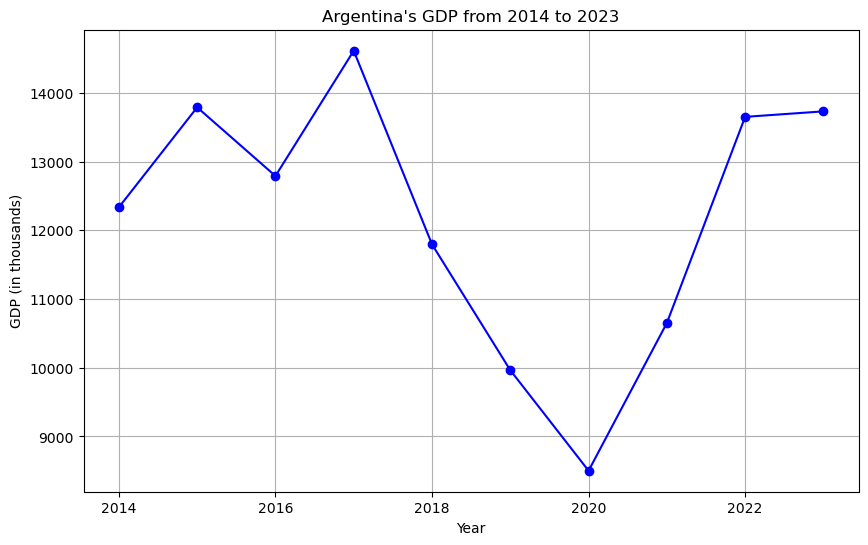

In [14]:
#data = data.plot(kind='scatter', x='Argentina', y='Asylum Applications')
#plot.show()

argentina = filtered_df[filtered_df["Country Name"] == "Argentina"].iloc[0]
argentina_df = argentina.to_frame(name = "Argentina")
argentina_df = argentina_df[4:]
argentina_df.index = list(range(2014,2024))
argentina_df.index.name = "Year"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(argentina_df.index, argentina_df['Argentina'], marker='o', color='blue', linestyle='-')
plt.title("Argentina's GDP from 2014 to 2023")
plt.xlabel("Year")
plt.ylabel("GDP (in thousands)")
plt.grid(True)
plt.show()

Argentina has a generally stable economy and political atmosphere -- compared to other countries in the global south -- which is demonstrated here; the only massive dip is seen in 2020, which is expected to be seen in most if not all of the countries' plots due to coronavirus. 

---------------------------------------------------------------------------------------------------------------------------------------------------------

The following code and graph will illustrate a *linear regression analysis* that explores the relationship between Argentina's GDP per capita and the numebr of asylum applications in the USA. 

the dataset is split into features (X) and the target variable (y); X represents Argentina's GDP (independent variable) and y represents the number of forms received in the USA (dependent variable) 
The data is also split into training and testing sets with an 80/20 ratio. 
The model is fitted to the training data, and predictions are generated for the test set. 

**Mean Squared Error (MSE)**: measures prediction error 

**R^2 Score**: explains how much of the variance in the dependent variable is explained by the independent variable. 

A scatter plot shows the actual data points, the red regression line is plotted to visualize the model's prediction 


---------------------------------------------------------------------------------------------------------------------------------------------------------

Mean Squared Error: 3511734138.6869955
R^2 Score: -0.02553409118722305


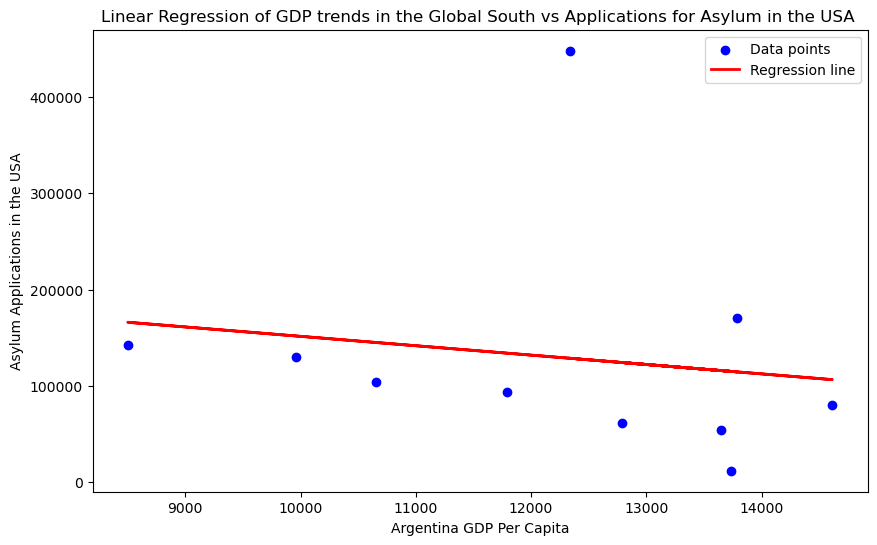

In [18]:
#linear regression 
#splitting the data into training and testing sets 
x = argentina_df[["Argentina"]]
y = data[["Forms Received"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
                                                    
#Initializing linear regression model 
model = LinearRegression()

#fitting model on training data 
model.fit(X_train, y_train)
                                                    
#predictions 
y_pred = model.predict(X_test)     

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')
plt.xlabel("Argentina GDP Per Capita")
plt.ylabel("Asylum Applications in the USA")
plt.legend()
plt.title("Linear Regression of GDP trends in the Global South vs Applications for Asylum in the USA ")
plt.show()



### Observations on the Linear Regression Plot for Argentina

**1. Poor Fit**  
- The linear regression model does not fit the data well. This is evident from the large scatter of data points around the regression line and the slight downward slope that does not capture the variation effectively.

**2. Negative \( R^2 \) Score**  
- An \( R^2 \) score of **-0.0255** indicates that the model performs worse than a simple mean-based prediction.  
- This suggests that Argentina's GDP per capita is not a meaningful predictor of asylum applications in the USA.

**3. High Mean Squared Error (MSE)**  
- The **MSE of 35,117,34138.68** reflects a significant deviation between the predicted and actual values, further supporting the poor performance of the model.

**4. Weak Negative Trend**  
- The regression line shows a slight downward slope, indicating a weak negative relationship between GDP per capita and asylum applications. The magnitude of this trend is small and unreliable due to poor fit.

**5. Data Variability**  
- The points are widely scattered, with no clear linear pattern, suggesting high variability in asylum applications that GDP per capita alone cannot explain.

**6. Feature Suitability**  
- The independent variable (**Argentina's GDP per capita**) may not be a strong predictor of asylum applications in the USA.  
- Incorporating additional predictors such as **political unrest, economic inequality, or violence rates** might improve the explanatory power of the model.

**7. Outliers**  
- There is a notable outlier at the upper end of asylum applications, which may disproportionately affect the regression line. Handling these outliers or using robust regression techniques could improve the analysis.



----------------------------------------------------------------------------------------------------------------------------------------------------------

This model will be implemented for all of the countries using a for-loop 

X = GDP per capita 
y = Number of Asylum applications submitted in the USA 

The time frame is 2014 to 2023

The intention is for the model to fit the data by finding the best values for $b_{0}$ and $b_{1}$ to minimize the sum of squared differences between the predicted and actual values (minimizing the Mean Squared Error).

I am expecting to see an inverse relationship with a -$b_{1}$, indicating that as the GDP per capita decreases, the number of asylum applications increase for a majority of the countries in the list. 

I will manually initiate a line plot and linear regression for the following 5 countries: Ecuador, Mexico, Honduras, Haiti, and Jamaica. These countries are chosen deliberately to get a sense of any geographic variation. 

---------------------------------------------------------------------------------------------------------------------------------------------------------

<h1 style="color: black; font-size: 24px;">Ecuador</h1>

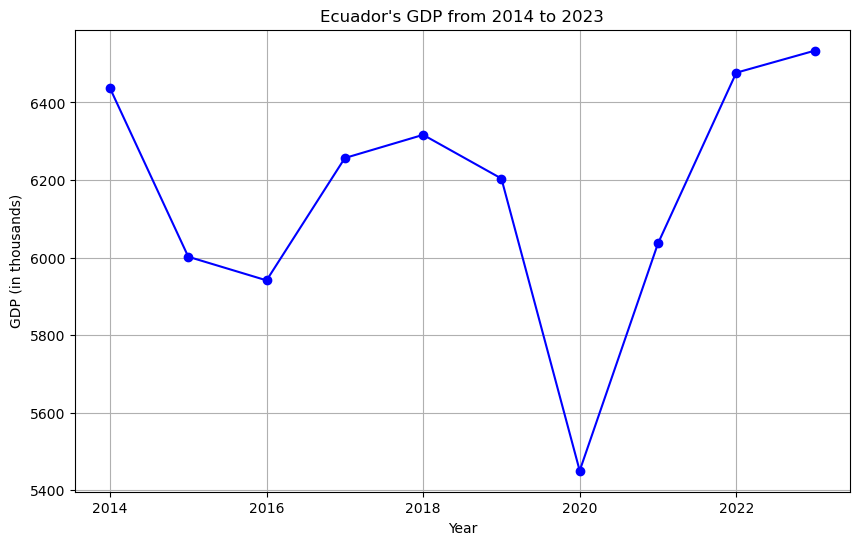

In [23]:
#ECUADOR 
#data = data.plot(kind='scatter', x='Ecuador', y='Asylum Applications')
#plot.show()

ecuador = filtered_df[filtered_df["Country Name"] == "Ecuador"].iloc[0]
ecuador_df = ecuador.to_frame(name = "Ecuador")
ecuador_df = ecuador_df[4:]
ecuador_df.index = list(range(2014,2024))
ecuador_df.index.name = "Year"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(ecuador_df.index, ecuador_df['Ecuador'], marker='o', color='blue', linestyle='-')
plt.title("Ecuador's GDP from 2014 to 2023")
plt.xlabel("Year")
plt.ylabel("GDP (in thousands)")
plt.grid(True)
plt.show()

Mean Squared Error: 5757909093.815471
R^2 Score: -0.6814860796587794


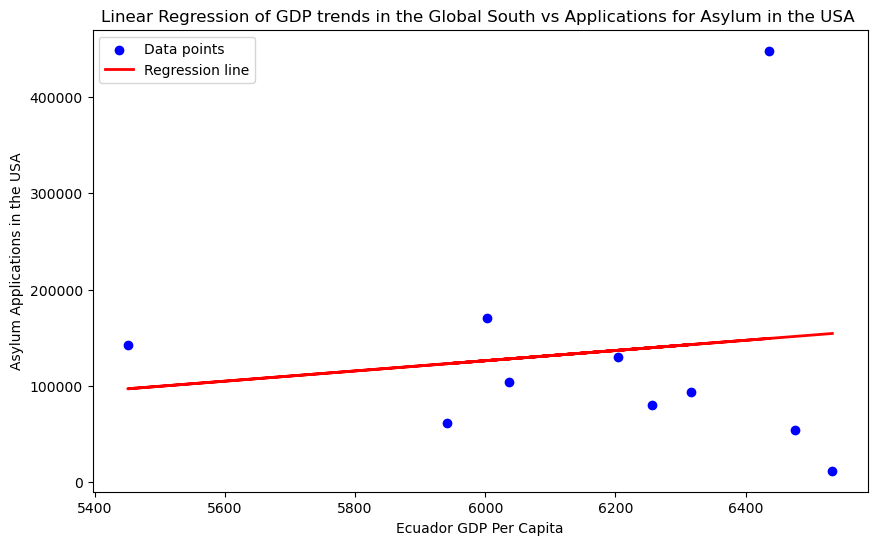

In [24]:
#linear regression 
#splitting the data into training and testing sets 
x = ecuador_df[["Ecuador"]]
y = data[["Forms Received"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
                                                    
#Initializing linear regression model 
model = LinearRegression()

#fitting model on training data 
model.fit(X_train, y_train)
                                                    
#predictions 
y_pred = model.predict(X_test)     

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')
plt.xlabel("Ecuador GDP Per Capita")
plt.ylabel("Asylum Applications in the USA")
plt.legend()
plt.title("Linear Regression of GDP trends in the Global South vs Applications for Asylum in the USA ")
plt.show()

### Observations on the Linear Regression Plot for Ecuador 

**1. Poor Fit**  
- The linear regression model does not fit the data well. The regression line does not capture the variability in the data, and there is a clear spread of points far from the line.

**2. Negative \( R^2 \) Score**  
- An \( R^2 \) score of **-0.681** indicates that the model performs significantly worse than a mean-based prediction. This suggests that Ecuador's GDP per capita is not a meaningful predictor of asylum applications in the USA.

**3. High Mean Squared Error (MSE)**  
- The **MSE of 575,790,9093.82** reflects a large deviation between the predicted and actual values. This further highlights the model's poor performance in capturing the relationship.

**4. Weak Positive Trend**  
- The regression line has a slight **positive slope**, indicating that as **Ecuador's GDP per capita increases**, asylum applications in the USA also slightly increase. However, this trend is weak and not reliable given the poor \( R^2 \) score.

**5. Data Variability**  
- The data points are widely scattered, with no clear linear pattern.  
- A prominent outlier at the upper end (very high asylum applications) significantly deviates from the trend.

**6. Feature Suitability**  
- Ecuador's GDP per capita appears to be a poor predictor of asylum applications in this dataset.  
- Additional features such as **political instability, economic crises, or violence levels** may be more suitable for explaining the variation.

**7. Outliers**  
- The presence of a significant outlier (with very high asylum applications) skews the regression line. Removing or addressing such outliers could improve model performance and provide a clearer understanding of the data.


------

<h1 style="color: black; font-size: 24px;">Honduras</h1>

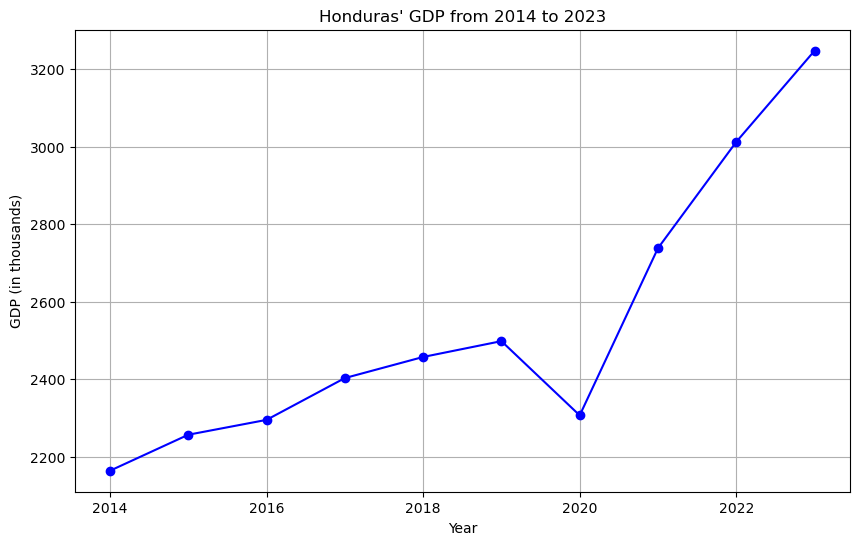

In [31]:
#HONDURAS
#data = data.plot(kind='scatter', x='Honduras', y='Asylum Applications')
#plot.show()

honduras = filtered_df[filtered_df["Country Name"] == "Honduras"].iloc[0]
honduras_df = honduras.to_frame(name = "Honduras")
honduras_df = honduras_df[4:]
honduras_df.index = list(range(2014,2024))
honduras_df.index.name = "Year"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(honduras_df.index, honduras_df['Honduras'], marker='o', color='blue', linestyle='-')
plt.title("Honduras' GDP from 2014 to 2023")
plt.xlabel("Year")
plt.ylabel("GDP (in thousands)")
plt.grid(True)
plt.show()

Mean Squared Error: 727113821.8377614
R^2 Score: 0.7876604597559712


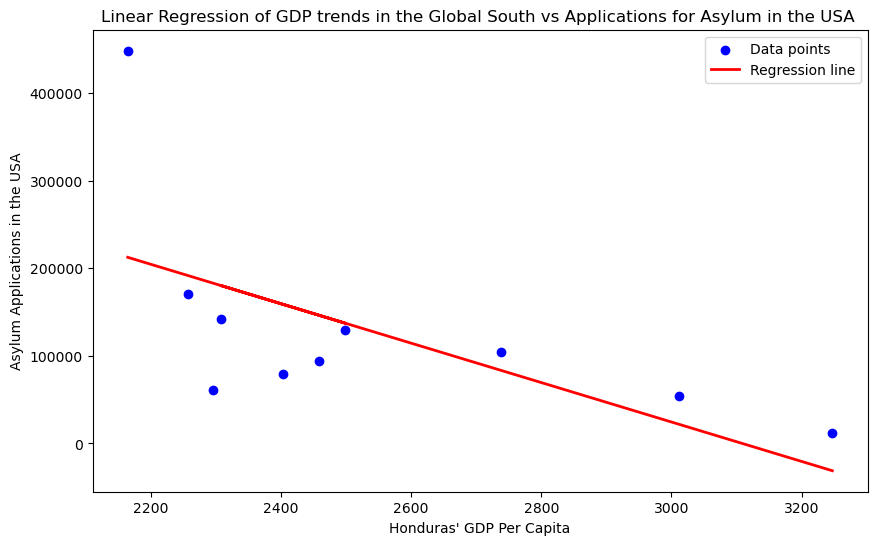

In [32]:
#linear regression 
#splitting the data into training and testing sets 
x = honduras_df[["Honduras"]]
y = data[["Forms Received"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
                                                    
#Initializing linear regression model 
model = LinearRegression()

#fitting model on training data 
model.fit(X_train, y_train)
                                                    
#predictions 
y_pred = model.predict(X_test)     

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')
plt.xlabel("Honduras' GDP Per Capita")
plt.ylabel("Asylum Applications in the USA")
plt.legend()
plt.title("Linear Regression of GDP trends in the Global South vs Applications for Asylum in the USA ")
plt.show()

### Observations on the Linear Regression Plot for Honduras

**1. Strong Fit**  
- The linear regression model provides a strong fit to the data. The regression line effectively captures the downward trend, with the majority of data points aligning close to the line.

**2. Positive \( R^2 \) Score**  
- An \( R^2 \) score of **0.788** indicates that approximately **78.7%** of the variance in asylum applications is explained by Honduras' GDP per capita. This suggests a strong and reliable relationship between GDP per capita and asylum applications.

**3. Mean Squared Error (MSE)**  
- The **MSE of 727,113,821.84** reflects a relatively low level of prediction error. This indicates that the model's predictions are fairly accurate.

**4. Clear Negative Trend**  
- The regression line has a **negative slope**, showing that as **Honduras' GDP per capita increases**, the number of asylum applications in the USA decreases.  
- This trend aligns with the hypothesis that economic improvements reduce migration pressures.

**5. Data Variability**  
- While the overall fit is strong, there is noticeable variability among the data points.  
- A single outlier with very high asylum applications (~450,000) at the lower GDP range influences the trend.

**6. Feature Suitability**  
- Honduras' GDP per capita appears to be a strong predictor of asylum applications, as reflected by the high \( R^2 \) score.  
- Including additional variables such as **violence rates, unemployment, or poverty levels** could further explain the remaining variance.

**7. Outliers**  
- One significant outlier with very high asylum applications at a GDP per capita of ~2,200 affects the overall trend. Addressing or further analyzing this outlier could refine the model and improve its accuracy.


----------

<h1 style="color: black; font-size: 24px;">Haiti</h1>

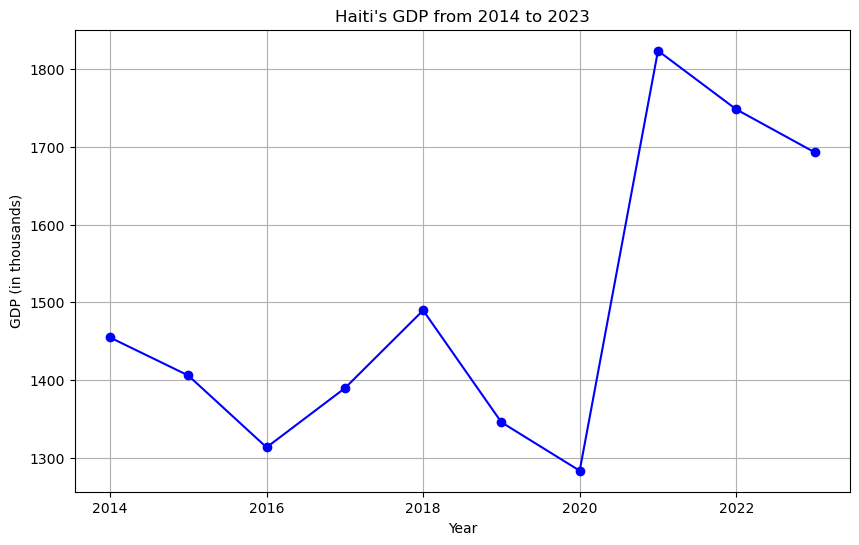

In [35]:
#HAITI 
#data = data.plot(kind='scatter', x='Haiti', y='Asylum Applications')
#plot.show()

haiti = filtered_df[filtered_df["Country Name"] == "Haiti"].iloc[0]
haiti_df = haiti.to_frame(name = "Haiti")
haiti_df = haiti_df[4:]
haiti_df.index = list(range(2014,2024))
haiti_df.index.name = "Year"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(haiti_df.index, haiti_df['Haiti'], marker='o', color='blue', linestyle='-')
plt.title("Haiti's GDP from 2014 to 2023")
plt.xlabel("Year")
plt.ylabel("GDP (in thousands)")
plt.grid(True)
plt.show()

Mean Squared Error: 1660262787.9829946
R^2 Score: 0.5151523372316811


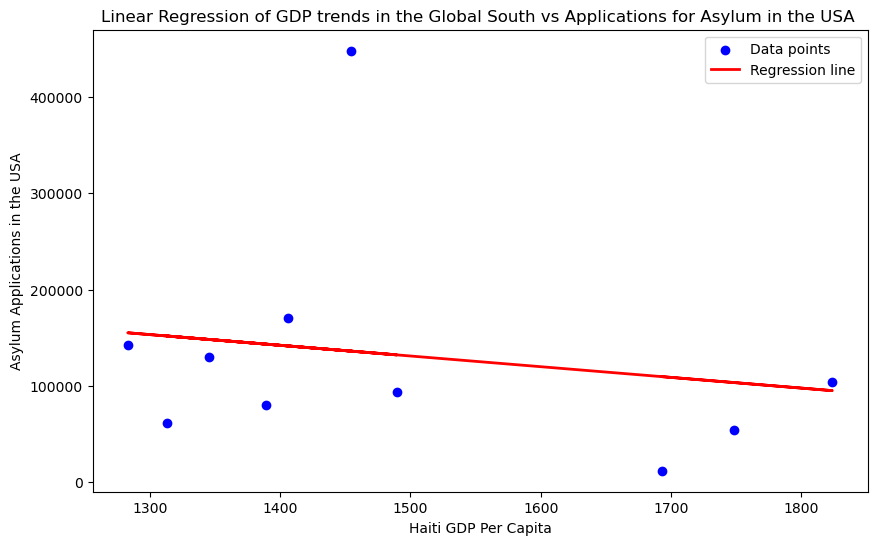

In [36]:
#linear regression 
#splitting the data into training and testing sets 
x = haiti_df[["Haiti"]]
y = data[["Forms Received"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
                                                    
#Initializing linear regression model 
model = LinearRegression()

#fitting model on training data 
model.fit(X_train, y_train)
                                                    
#predictions 
y_pred = model.predict(X_test)     

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')
plt.xlabel("Haiti GDP Per Capita")
plt.ylabel("Asylum Applications in the USA")
plt.legend()
plt.title("Linear Regression of GDP trends in the Global South vs Applications for Asylum in the USA ")
plt.show()

### Observations on the Linear Regression Plot

**1. Moderate Fit**  
- The linear regression model provides a moderate fit to the data. The regression line captures the general downward trend, but there is noticeable scatter in the data points.

**2. Positive \( R^2 \) Score**  
- An \( R^2 \) score of **0.515** indicates that approximately **51.5%** of the variance in asylum applications can be explained by Haiti's GDP per capita. This reflects a moderately strong relationship between the two variables.

**3. Mean Squared Error (MSE)**  
- The **MSE of 166,026,2787.98** indicates a fair level of prediction error, though lower than models with poorer fits. This suggests that the model performs reasonably well at estimating the trend.

**4. Negative Trend**  
- The regression line has a **negative slope**, indicating that as Haiti's GDP per capita increases, the number of **asylum applications in the USA decreases**. This supports the hypothesis that improved economic conditions in Haiti may correlate with fewer asylum applications.

**5. Data Variability**  
- While the model captures the general trend, there is variability among the data points. Some points, particularly an outlier at the upper end (very high asylum applications), deviate significantly from the regression line.

**6. Feature Suitability**  
- Haiti's GDP per capita appears to be a somewhat meaningful predictor of asylum applications, as evidenced by the moderate \( R^2 \) score.  
- However, including additional features like **political instability, natural disasters, or violence rates** could improve the model’s accuracy.

**7. Outliers**  
- A prominent outlier with very high asylum applications skews the overall trend slightly. Addressing this outlier or using more robust regression methods could enhance the model's performance.


------

<h1 style="color: black; font-size: 24px;">Jamaica</h1>

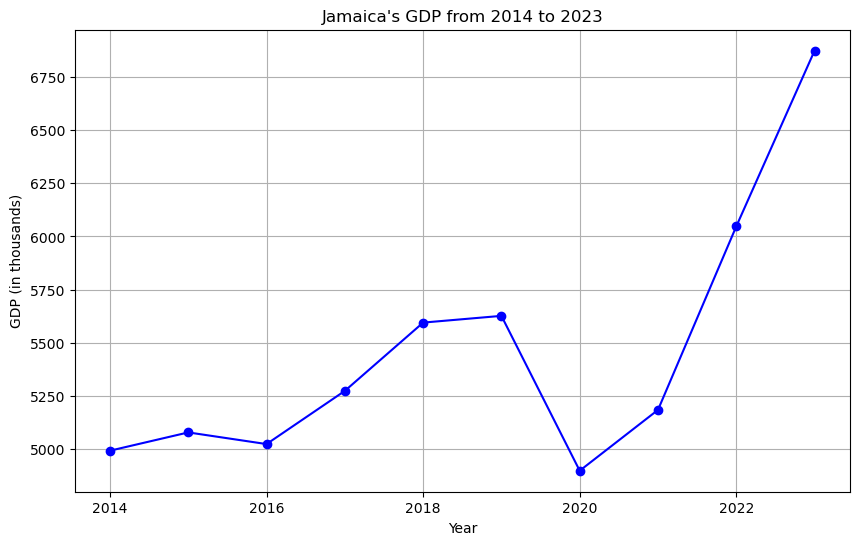

In [39]:
#JAMAICA
#data = data.plot(kind='scatter', x='Jamaica', y='Asylum Applications')
#plot.show()

jamaica = filtered_df[filtered_df["Country Name"] == "Jamaica"].iloc[0]
jamaica_df = jamaica.to_frame(name = "Jamaica")
jamaica_df = jamaica_df[4:]
jamaica_df.index = list(range(2014,2024))
jamaica_df.index.name = "Year"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(jamaica_df.index, jamaica_df['Jamaica'], marker='o', color='blue', linestyle='-')
plt.title("Jamaica's GDP from 2014 to 2023")
plt.xlabel("Year")
plt.ylabel("GDP (in thousands)")
plt.grid(True)
plt.show()

Mean Squared Error: 206472673.25400686
R^2 Score: 0.9397036458461193


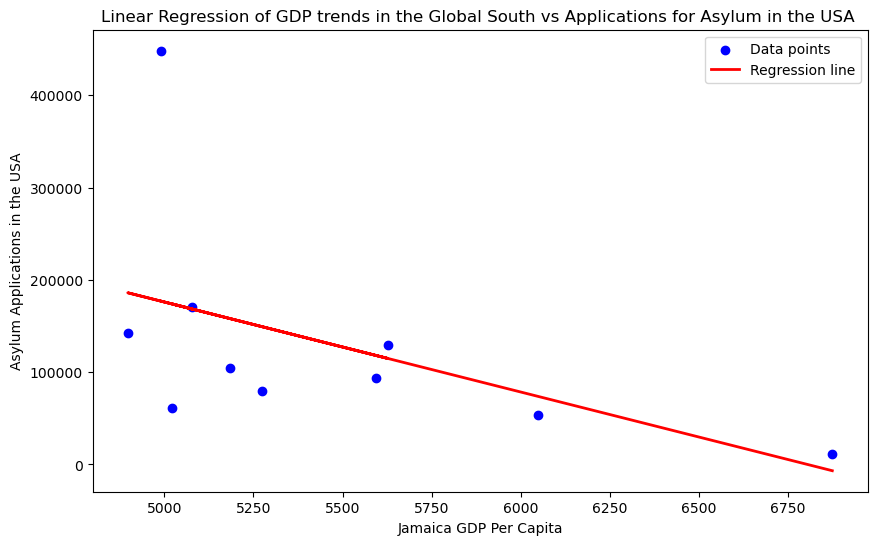

In [40]:
#linear regression 
#splitting the data into training and testing sets 
x = jamaica_df[["Jamaica"]]
y = data[["Forms Received"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
                                                    
#Initializing linear regression model 
model = LinearRegression()

#fitting model on training data 
model.fit(X_train, y_train)
                                                    
#predictions 
y_pred = model.predict(X_test)     

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')
plt.xlabel("Jamaica GDP Per Capita")
plt.ylabel("Asylum Applications in the USA")
plt.legend()
plt.title("Linear Regression of GDP trends in the Global South vs Applications for Asylum in the USA ")
plt.show()

### Observations on the Linear Regression Plot for Jamaica

**1. Very Strong Fit**  
- The linear regression model provides an excellent fit to the data. The regression line effectively captures the downward trend, with most data points closely aligned along the line.

**2. Positive \( R^2 \) Score**  
- An \( R^2 \) score of **0.939** indicates that approximately **93.9%** of the variance in asylum applications is explained by Jamaica's GDP per capita. This demonstrates a very strong and reliable relationship between the two variables.

**3. Mean Squared Error (MSE)**  
- The **MSE of 20,647,267.25** reflects a very low level of prediction error. This indicates that the model's predictions are highly accurate.

**4. Clear Negative Trend**  
- The regression line has a **negative slope**, showing that as **Jamaica's GDP per capita increases**, the number of asylum applications in the USA decreases.  
- This supports the hypothesis that economic improvements are associated with reduced migration pressures.

**5. Data Variability**  
- While the overall fit is very strong, there is a single significant outlier at the lower GDP range (~5,000 GDP per capita) with very high asylum applications (~450,000). Most of the other points cluster tightly around the regression line.

**6. Feature Suitability**  
- Jamaica's GDP per capita is an excellent predictor of asylum applications, as reflected by the high \( R^2 \) score.  
- While additional predictors could be explored, the GDP per capita alone explains a substantial portion of the variance.

**7. Outliers**  
- One significant outlier with very high asylum applications (~450,000) at a lower GDP per capita (~5,000) slightly skews the regression line. Addressing or analyzing this outlier could refine the model further.


---------

<h1 style="color: black; font-size: 24px;">Mexico</h1>

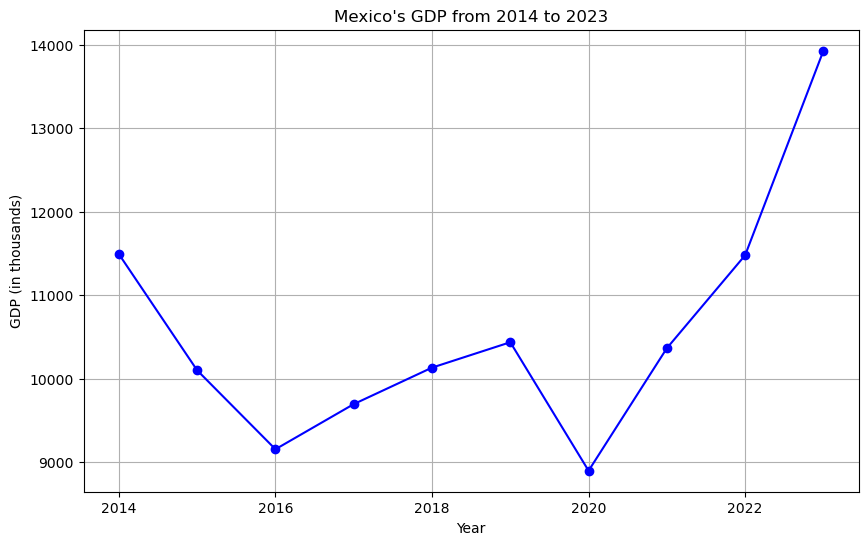

In [47]:
#MEXICO
#data = data.plot(kind='scatter', x='Mexico', y='Asylum Applications')
#plot.show()

mexico = filtered_df[filtered_df["Country Name"] == "Mexico"].iloc[0]
mexico_df = mexico.to_frame(name = "Mexico")
mexico_df = mexico_df[4:]
mexico_df.index = list(range(2014,2024))
mexico_df.index.name = "Year"

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(mexico_df.index, mexico_df['Mexico'], marker='o', color='blue', linestyle='-')
plt.title("Mexico's GDP from 2014 to 2023")
plt.xlabel("Year")
plt.ylabel("GDP (in thousands)")
plt.grid(True)
plt.show()

Mean Squared Error: 4100241809.938505
R^2 Score: -0.197396383706691


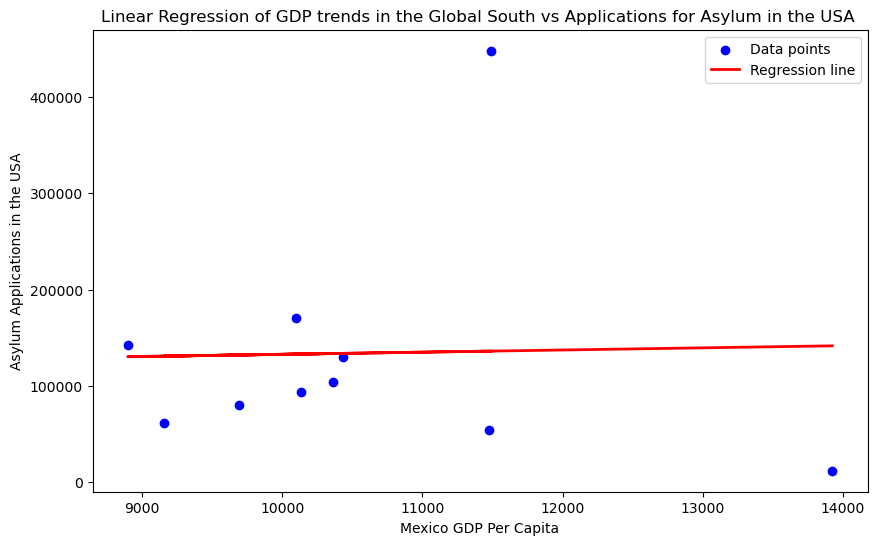

In [48]:
#linear regression 
#splitting the data into training and testing sets 
x = mexico_df[["Mexico"]]
y = data[["Forms Received"]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
                                                    
#Initializing linear regression model 
model = LinearRegression()

#fitting model on training data 
model.fit(X_train, y_train)
                                                    
#predictions 
y_pred = model.predict(X_test)     

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')
plt.xlabel("Mexico GDP Per Capita")
plt.ylabel("Asylum Applications in the USA")
plt.legend()
plt.title("Linear Regression of GDP trends in the Global South vs Applications for Asylum in the USA ")
plt.show()

### Observations on the Linear Regression Plot for Mexico

**1. Poor Fit**  
- The linear regression model does not fit the data well. The regression line is almost flat, failing to capture any meaningful trend among the data points.

**2. Negative \( R^2 \) Score**  
- An \( R^2 \) score of **-0.197** indicates that the model performs worse than a horizontal line (mean-based prediction). This suggests that Mexico's GDP per capita is not a significant predictor of asylum applications in the USA.

**3. High Mean Squared Error (MSE)**  
- The **MSE of 41,002,418,809.94** reflects a large prediction error, further highlighting the model's inability to explain the variance in the data.

**4. No Clear Trend**  
- The regression line shows no significant slope, indicating no discernible relationship between Mexico's GDP per capita and the number of asylum applications in the USA.  
- The lack of a trend suggests other factors beyond GDP per capita drive asylum applications.

**5. Data Variability**  
- The data points exhibit significant variability, with no clear clustering or alignment along the regression line. A few points, such as one with very high asylum applications (~450,000) and another with low applications at higher GDP, skew the dataset.

**6. Feature Suitability**  
- Mexico's GDP per capita does not appear to be a suitable predictor for asylum applications in this context.  
- Incorporating additional variables, such as **violence rates, political instability, or poverty levels**, might provide better insights into the drivers of asylum applications.

**7. Outliers**  
- A single high outlier with asylum applications (~450,000) at a GDP of ~9,000 and another low outlier at higher GDP (~14,000) significantly influence the regression line. Removing or analyzing these points separately could help refine the analysis.


--------